<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [5]:
# Import Required Libariries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

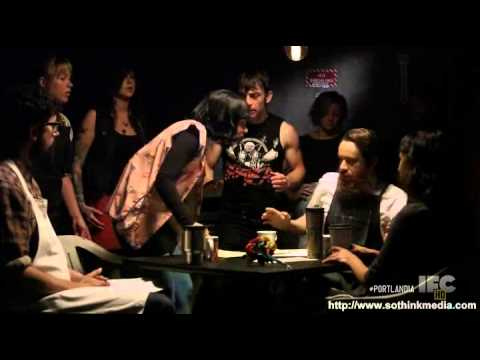

In [6]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [7]:
%pwd

'/Users/rubyclaguna/Desktop/Sprint_4.1/module1-text-data'

In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [9]:
# remove "star rating" str from column star_rating
df['star_rating'] = df['star_rating'].str.replace('star rating', '')

In [10]:
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


In [11]:
df['star_rating'].value_counts()

 5.0      3780
 4.0      2360
 3.0       738
 2.0       460
 1.0       278
Name: star_rating, dtype: int64

In [12]:
df.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
dtype: object

In [13]:
# convert star_rating column to float 
df['star_rating'] = df['star_rating'].astype(float)

In [14]:
df.dtypes

coffee_shop_name     object
full_review_text     object
star_rating         float64
dtype: object

In [15]:
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [16]:
# tokenize full_review_text, add column
tokenizer = Tokenizer(nlp.vocab)

tokens = []

for doc in tokenizer.pipe(shops['full_review_text']):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

df.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,"[ , 11/25/2016, 1, check-in, Love, love, loved..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"[ , 12/2/2016, Listed, in, Date, Night:, Austi..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,"[ , 11/25/2016, Very, cool, decor!, Good, drin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,"[ , 12/3/2016, 1, check-in, They, are, located..."


In [17]:
# inspect reviews
df.full_review_text.value_counts(normalize=True)[:15]

 11/10/2016 3 check-ins This place has been shown on my social media for days so i finally visited! One of THE cutest and artistic looking coffeeshops I have ever visited. You can self order which is nice because you can take your time and look at the pictures to help you decide! I especially liked how pictures were shown so I knew which coffee/tea came out aesthetically  I ordered the famous matcha green latte and i dont usually drink coffee but it went beyond my expectations. They give you a good amount and its creamy and sweet. Only downside is no wifi.. So hard to study here. Matcha green tea and living la vida mocha Matcha green tea latte Interior design See all photos from Sarah L. for The Factory - Cafe With a Soul                                                                                                                                                                                                                                                                             

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [18]:
STOP_WORDS = nlp.Defaults.stop_words.union(["coffee","got","check-in","i'm","i've","place","it's"," ",
                                            "come","1","try","order","-","time", "drink","shop", "like"])

In [19]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.lemma_.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [20]:
def count(docs):
    
    word_counts = Counter()
    appears_in = Counter()
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    total = wc['count'].sum()
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    total_docs = len(docs)
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [21]:
wc = count(df['tokens'])
print (wc.shape)
wc.head()

(37589, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
148,great,2454,3272,1.0,0.008891,0.008891,0.322216
153,good,2158,2896,2.0,0.007869,0.016760,0.283351
29,love,1689,2161,3.0,0.005872,0.022632,0.221770
750,little,1230,1479,4.0,0.004019,0.026650,0.161502
810,work,1206,1475,5.0,0.004008,0.030658,0.158351


In [22]:
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
148,great,2454,3272,1.0,0.008891,0.008891,0.322216
153,good,2158,2896,2.0,0.007869,0.016760,0.283351
29,love,1689,2161,3.0,0.005872,0.022632,0.221770
750,little,1230,1479,4.0,0.004019,0.026650,0.161502
810,work,1206,1475,5.0,0.004008,0.030658,0.158351
375,well,1238,1422,6.0,0.003864,0.034522,0.162553
175,nice,1222,1412,7.0,0.003837,0.038359,0.160452
303,don't,1133,1395,8.0,0.003791,0.042149,0.148766
443,food,1109,1391,9.0,0.003780,0.045929,0.145614
17,pretty,1069,1342,10.0,0.003647,0.049576,0.140362


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [23]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ == 'ADJ'):
                lemmas.append(token.lemma_)
    
    return lemmas

In [24]:
df['lemmas'] = df['full_review_text'].apply(get_lemmas)

In [25]:
df['lemmas'].head()

0                               [streamlined, typical]
1    [beautiful, worthy, pretty, decent, unique, nice]
2    [eclectic, homey, plush, pricy, worth, ample, ...
3    [cool, good, nice, overpriced, extra, loud, od...
4    [computerized, friendly, easy, tart, ideal, ne...
Name: lemmas, dtype: object

In [ ]:
df['lemmas'] = df['full_review_text'].apply(get_lemmas)

In [ ]:
# top 20 words from good reviews 

good_reviews = count(df[df['star_rating'] > 3]['lemmas'])

good_top20 = good_reviews[good_reviews['rank'] <= 20]

In [ ]:
squarify.plot(sizes=good_top20['pct_total'], label=good_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
# top 20 words from bad reviews 

bad_reviews = count(df[df['star_rating'] < 3]['lemmas'])

bad_top20 = bad_reviews[bad_reviews['rank'] <= 20]

In [ ]:
squarify.plot(sizes=bad_top20['pct_total'], label=bad_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

